# 실습하기
> 유클리디안 유사도는 빈도수로 유사성을 판단하는 알고리즘이다.

##1. 데이터 설정

In [ ]:
docs = [
        '여름엔 과일이 맛있다', 
        '여름엔 수박이 맛있다',
        '여름엔 바다지',
        '여름엔 과일이 맛없다']

> 위의 데이터로 유사도를 구할 경우 같은 단어들의 빈도수가 많이 나타나면 유사하다고 판단한다. 따라서 문서1과 문서2의 '여름엔', '맛있다' 라는 두 단어가 같음으로 가장 유사도가 높다고 판단할 수 있다.

##2. 데이터 변환

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

> 같은 단어의 갯수를 이용하여 유사도를 판단할 것이므로 CountVectorizer를 사용할 것이다.

In [ ]:
count_vect = vect.fit_transform(docs)
count_vect

<4x6 sparse matrix of type '<class 'numpy.int64'>'
	with 11 stored elements in Compressed Sparse Row format>

> fit_transform은 fit과 transform을 함께 처리하는 함수로 각 문서에 나타난모든 단어를 행렬로 만든 후 단어가 존재하는 곳에 갯수를 출력하는 기능을 한다. 이렇게 만들어진 것을 희소행렬(sparse matrix)라고 한다.

In [ ]:
count_vect.toarray()

array([[1, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 1, 1],
       [0, 0, 0, 1, 0, 1],
       [1, 1, 0, 0, 0, 1]])

>toarray 함수를 이용하여 희소행렬의 내부 데이터를 확인할 수 있다. 현재 모든 단어들이 한번씩만 나타남으로 1로 표현되었다.

In [ ]:
vect.vocabulary_

{'과일이': 0, '맛없다': 1, '맛있다': 2, '바다지': 3, '수박이': 4, '여름엔': 5}

>vocabulary_를 통해 희소행렬의 feature 정보를 확인할 수 있다.

In [ ]:
import pandas as pd

df = pd.DataFrame(count_vect.toarray(), columns=vect.vocabulary_)
df

,여름엔,과일이,맛있다,수박이,바다지,맛없다
0,1,0,1,0,0,1
1,0,0,1,0,1,1
2,0,0,0,1,0,1
3,1,1,0,0,0,1


> dataframe으로 변환하여 결과를 확인해 보면 feature 정보가 잘못된 것을 볼 수 있다.

In [ ]:
df = pd.DataFrame(count_vect.toarray(), columns=sorted(vect.vocabulary_))
df.index=['문서1','문서2','문서3','문서4']
df

,과일이,맛없다,맛있다,바다지,수박이,여름엔
문서1,1,0,1,0,0,1
문서2,0,0,1,0,1,1
문서3,0,0,0,1,0,1
문서4,1,1,0,0,0,1


> dataframe 변환 시 vocabulary_ 정보가 바뀌어 들어가서 sorted함수를 이용하여 정렬을 진행하였다. 또한 index 정보를 추가하였다.

##3. 데이터 분석

In [ ]:
import numpy as np

val_square = np.square(df.loc['문서1']- df.loc['문서2'])
val_square

과일이    1
맛없다    0
맛있다    0
바다지    0
수박이    1
여름엔    0
dtype: int64

> 각 문서의 빈도수에 대한 제곱을 위와 같이 구할 수 있다.

In [ ]:
val_square_sum = sum(val_square)
val_square_sum

2

> 이렇게 구한 제곱의 합을 sum함수를 이용하여 구할 수 있다.

In [ ]:
n1 = np.sqrt(val_square_sum)
n1

1.4142135623730951

> 유사도는 합에 대한 루트값이므로 sqrt를 이용하여 구할 수 있다.

In [ ]:
# len(df.index)
for idx in range(df.shape[0]):
  val_square = np.square(df.iloc[0]- df.iloc[idx])
  val_square_sum = sum(val_square)
  result = np.sqrt(val_square_sum)
  print(result)

> 결국 반복문을 이용하여 문서 1에 대한 유사도를 구할 수 있다.

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

euclidean_distances(df, df)

array([[0.        , 1.41421356, 1.73205081, 1.41421356],
       [1.41421356, 0.        , 1.73205081, 2.        ],
       [1.73205081, 1.73205081, 0.        , 1.73205081],
       [1.41421356, 2.        , 1.73205081, 0.        ]])

> 간단하게 euclidean_distances를 이용하여 유사도를 판단할 수 있다. 유사도는 가까울 수록(수치가 작을 수록) 유사도가 높다고 판단할 수 있다. 

> 위의 결과로 다음과 같은 정보를 얻을 수 있다.
* 문서1과 유사도가 높은 것은 문서2와 문서4이다.
* 문서2와 문서4는 유사도가 가장 약하다
* 문서내의 긍정과 부정적 단어는 유사도에 영향을 미치지 못하며 오직 빈도수로만 유사도를 구하게 된다.
* 빈도수가 올라가면 유사도는 점점 약해진다.

##4. Quiz

In [ ]:
docs = [
        '여름엔 과일이 맛있다 여름엔 과일이 맛있다', 
        '여름엔 수박이 맛있다',
        '여름엔 바다지',
        '여름엔 과일이 맛없다']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
count_vect = vect.fit_transform(docs)
count_vect.toarray()

array([[2, 0, 2, 0, 0, 2],
       [0, 0, 1, 0, 1, 1],
       [0, 0, 0, 1, 0, 1],
       [1, 1, 0, 0, 0, 1]])

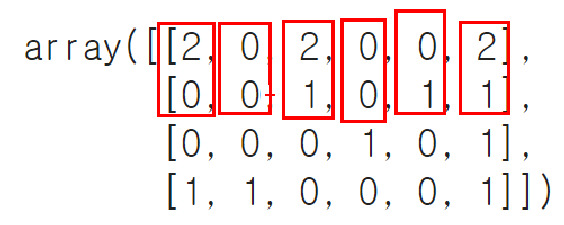

> 문서 1과 문서2 유사도는 다음과 같이 구할 수 있다.
* 2-0의 제곱 = 4
* 0-0의 제곱 = 0
* 2-1의 제곱 = 1
* 0-0의 제곱 = 0
* 0-1의 제곱 = 1
* 2-1의 제곱 = 1
* 위 내용의 전체 합은 7
* 7에 대한 루트 = 대략 2.xxx

In [ ]:
import pandas as pd

df = pd.DataFrame(count_vect.toarray(), columns=sorted(vect.vocabulary_))
df.index = ['문서1','문서2','문서3','문서4']

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

euclidean_distances(df, df)

array([[0.        , 2.64575131, 3.16227766, 2.64575131],
       [2.64575131, 0.        , 1.73205081, 2.        ],
       [3.16227766, 1.73205081, 0.        , 1.73205081],
       [2.64575131, 2.        , 1.73205081, 0.        ]])

> 중복된 데이터가 나타나면서 유사도는 약해지게 된다. 결국 유클리디안 유사도의 문제점은 중복된 데이터가 나타나면 이를 다른 문서로 판단하게 된다는 것이다.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import euclidean_distances
import pandas as pd

vect = CountVectorizer()
countvect = vect.fit_transform(docs)

convert_df = pd.DataFrame(countvect.toarray(), columns=sorted(vect.vocabulary_))
convert_df.index = ['문서1', '문서2', '문서3', '문서4']

print(euclidean_distances(convert_df, convert_df))

> 위와 같이 한번에 처리도 가능하다

In [1]:
# 드라이브 로딩
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


```
id : 아이디
title : 영화 제목
genres : 장르
vote_average : 평점
vote_count : 투표수
popularity : 인기도
keywords : 주요 키워드
overview : 영화 개요
tmdb_5000_movies.csv 열어 위의 내용만 가지고 있는 DataFrame을 생성하시오
```

In [3]:
import pandas as pd
path = '/content/drive/MyDrive/4. 머신러닝/10. 추천 알고리즘/2. content Based/data/tmdb_5000_movies.csv'
df_movies = pd.read_csv(path)
df_movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
movie_features = ['id', 'title', 'genres', 'vote_average', 'vote_count', 'popularity', 'keywords', 'overview']
df_movies_back = df_movies[movie_features]
df_movies_back.head()

In [ ]:
# 결측치 처리
df_movies_back.info()

In [ ]:
df_movies_back[df_movies_back['overview'].isnull()]

In [ ]:
# df_movies_back.dropna().info()
df_movies_back.dropna(inplace=True)
df_movies_back.info()

In [ ]:
df_movies_back[['genres', 'keywords']][:3]

,genres,keywords
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name..."


In [ ]:
pd.set_option('max_colwidth', 100)
df_movies_back[['genres', 'keywords']][:3]

,genres,keywords
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""sp..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""name"": ""Action""}]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""name"": ""drug abuse""}, {""id"": 911, ""name"": ""exotic is..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 80, ""name"": ""Crime""}]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name"": ""based on novel""}, {""id"": 4289, ""name"": ""secret..."


In [ ]:
str_dict = '{"id": 28, "name": "Action"}'
str_dict

In [ ]:
type(str_dict)

str

In [ ]:
dict = {"id": 28, "name": "Action"}
dict['id']

28

In [ ]:
type(dict)

dict

In [ ]:
str_dict['id']

In [ ]:
df_movies_back['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [ ]:
df_movies_back['genres'][0][:10]

'[{"id": 28'

In [ ]:
type(df_movies_back['genres'][0])

str

In [ ]:
from ast import literal_eval
# literal_eval은 str 형을 원래의 형식으로 변경해줌
tmp = literal_eval(df_movies_back['genres'][0])
type(tmp)
tmp[0]
tmp[0]['id']

'Action'

In [ ]:
# tmp에 저장되어 있는 모든 name 정보를 출력하시오
tmp
# 1. 리스트의 모든 정보 출력
for i in range(len(tmp)):
  # print(tmp[i])
# 2. dictionary의 name 정보 출력
  print(tmp[i]['name'])

Action
Adventure
Fantasy
Science Fiction


In [7]:
from ast import literal_eval
# 모든 genres의 type을 str에서 list 형식으로 변경
df_movies_back['genres'] = df_movies_back['genres'].apply(literal_eval)
df_movies_back['genres'][0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [ ]:
for genre in df_movies_back['genres'][0]:
  print(genre['name'])

In [8]:
df_movies_back['genres'] = df_movies_back['genres'].apply(lambda x : [genre['name'] for genre in x])
df_movies_back['genres'][0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [ ]:
' '.join(df_movies_back['genres'][0])

'Action-0------Adventure-0------Fantasy-0------Science Fiction'

In [ ]:
df_movies_back['genres_split'] = df_movies_back['genres'].apply(lambda x : (' ').join(x))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# 벡터화
vect = CountVectorizer(ngram_range=(1, 2))
vect.fit(df_movies_back['genres_split'])
vect.vocabulary_

In [12]:
count_vect = vect.transform(df_movies_back['genres_split'])
count_vect.shape

(4800, 276)

In [13]:
# 유사도 분석
from sklearn.metrics.pairwise import cosine_similarity

genre_sim = cosine_similarity(count_vect, count_vect)
genre_sim[:3]

array([[1.        , 0.59628479, 0.4472136 , ..., 0.        , 0.        ,
        0.        ],
       [0.59628479, 1.        , 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.4472136 , 0.4       , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
genre_sim[:3]

In [14]:
genre_sim_sorted_arg = genre_sim.argsort()[:, ::-1]
genre_sim_sorted_arg[:46]

array([[   0,   46,  813, ..., 3037, 3036, 2399],
       [ 329,  129,    1, ..., 3066, 3065, 2399],
       [1542,    2, 1740, ..., 2998, 2997, 2399],
       ...,
       [ 476, 1272, 2253, ..., 2894, 2893, 2399],
       [2309, 1528,  162, ..., 3091, 3090, 2399],
       [ 542,   45, 1654, ..., 1244, 3483, 4799]])

In [ ]:
print(df_movies_back.iloc[0][['title', 'genres']])
print('='*70)
print(df_movies_back.iloc[46][['title', 'genres']])
print('='*70)
print(df_movies_back.iloc[813][['title', 'genres']])
print('='*70)

title                                            Avatar
genres    [Action, Adventure, Fantasy, Science Fiction]
Name: 0, dtype: object
title                        X-Men: Days of Future Past
genres    [Action, Adventure, Fantasy, Science Fiction]
Name: 46, dtype: object
title                                          Superman
genres    [Action, Adventure, Fantasy, Science Fiction]
Name: 813, dtype: object


In [ ]:
# Avatar를 검색하여 정보를 얻어 오는 코드를 만드시오
title = 'Avatar'
# df_movies_back['title']
find_movie = df_movies_back[df_movies_back['title'].str.lower()==title.lower()]
find_movie.index.values

In [ ]:
idx = find_movie.index.values[0]
genre_sim_sorted_arg[idx, :10]

In [ ]:
for i in genre_sim_sorted_arg[idx, :10]:
  print(df_movies_back.iloc[i]['title'])

In [17]:
genre_sim_sorted_arg[[0, 46, 813]]

array([[   0,   46,  813, ..., 3037, 3036, 2399],
       [   0,   46,  813, ..., 3037, 3036, 2399],
       [   0,   46,  813, ..., 3037, 3036, 2399]])

In [19]:
genre_sim_sorted_arg[:47]

array([[   0,   46,  813, ..., 3037, 3036, 2399],
       [ 329,  129,    1, ..., 3066, 3065, 2399],
       [1542,    2, 1740, ..., 2998, 2997, 2399],
       ...,
       [2309, 1528,  162, ..., 3091, 3090, 2399],
       [ 542,   45, 1654, ..., 1244, 3483, 4799],
       [   0,   46,  813, ..., 3037, 3036, 2399]])